# cadCAD Experiment


In [1]:
# if this crashes, run this:
# pip install ipython-autotime
%load_ext autotime
%load_ext autoreload
%autoreload 2
# import sys
# sys.path.append("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Experiments

# from model.plot_utils import *

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline





time: 828 ms (started: 2021-08-09 10:22:31 -04:00)


In [2]:
from model import run

loaded GraphQL_data\SIstakeDelegateds.csv.
loaded GraphQL_data\SIstakeLockeds.csv.
loaded GraphQL_data\SIstakeWithdrawns.csv.
loaded GraphQL_data\SIallocationCloseds.csv.
loaded GraphQL_data\SIallocationCollecteds.csv.
running file: sim_setup.py
end of file: sim_setup.py
time: 172 ms (started: 2021-08-09 10:22:32 -04:00)


In [3]:
df = run.run()
import pickle
with open('experiment.p', 'wb') as f:
    pickle.dump(df, f)



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (90, 24, 1, 8)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
pool_delegated_stake=Decimal('1243612'), shares=1243612, delegation_tax_rate=Decimal('0'), delegation_tokens_quantity=Decimal('1094.500000000000000000')
ACTION: DELEGATE--
                delegator_id='0x63f8168f665f79101a0e0da2313cd1391e1c5e27', 
                delegator.holdings=Decimal('9999998905.500000000000000000'), 
                delegator.delegated_tokens=Decimal('1094.500000000000000000'), 
                delegator.undelegated_tokens=0, 
                delegator.shares=Decimal('1094.500000000000000000000000')
pool_

In [4]:
df

,id_indexer,pool_delegated_stake,pool_locked_stake,shares,delegators,GRT,indexing_revenue,query_revenue,simulation,subset,run,substep,timestep
5,indexer,1243612,0,1243612,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,1,5,1
10,indexer,1243612,0,1243612,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,1,5,2
15,indexer,1243612,0,1243612,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,1,5,3
20,indexer,1243612,0,1243612,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,1,5,4
25,indexer,1243612,0,1243612,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,indexer,1322815.111243884567200334000,0,1322815.111243884567200334000,{'indexer': <model.parts.delegator.Delegator o...,2480000.000000000000000000,2480000.000000000000000000,0.970125109574860079,0,0,1,5,86
435,indexer,1322815.111243884567200334000,0,1322815.111243884567200334000,{'indexer': <model.parts.delegator.Delegator o...,2480000.000000000000000000,2480000.000000000000000000,0.970125109574860079,0,0,1,5,87
440,indexer,1322815.111243884567200334000,0,1322815.111243884567200334000,{'indexer': <model.parts.delegator.Delegator o...,2480000.000000000000000000,2480000.000000000000000000,0.970125109574860079,0,0,1,5,88
445,indexer,1322815.111243884567200334000,0,1322815.111243884567200334000,{'indexer': <model.parts.delegator.Delegator o...,2480000.000000000000000000,2480000.000000000000000000,0.970125109574860079,0,0,1,5,89


time: 78 ms (started: 2021-08-09 10:22:32 -04:00)


# Revenue coming in each period.  
## Indexing rewards and query rewards come in as an event stream.

<AxesSubplot:>

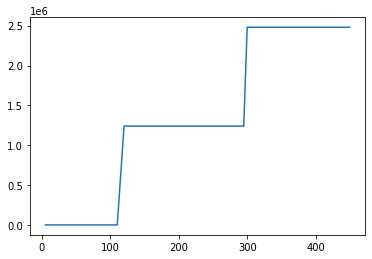

time: 297 ms (started: 2021-08-09 10:22:32 -04:00)


In [5]:
df.GRT.astype(float).plot()

<AxesSubplot:>

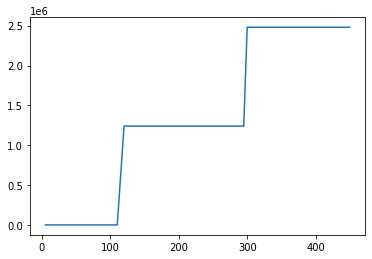

time: 156 ms (started: 2021-08-09 10:22:33 -04:00)


In [6]:
df.indexing_revenue.astype(float).plot()

<AxesSubplot:>

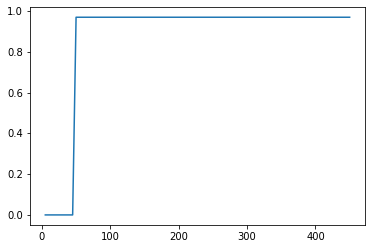

time: 156 ms (started: 2021-08-09 10:22:33 -04:00)


In [7]:
df.query_revenue.astype(float).plot()

# Cumulative Claimed Rewards
This shows that the cumulative rewards continues to rise even though each delegator eventually leaves the system and their rewards become fixed.  They are of similar heights (ie. same rewards) because they all use the same policies to join and leave.

In [8]:
import pandas as pd
df1 = df.reset_index().delegators

delegator_holdings = {}
delegator_shares = {}
timestep = 0
for delegator_dict in df1:
    for delegator_id, delegator in delegator_dict.items():
        if delegator_id not in delegator_holdings:
            delegator_holdings[delegator_id] = {}
            delegator_shares[delegator_id] = {}
        delegator_holdings[delegator_id][timestep] = float(delegator.holdings)
        delegator_shares[delegator_id][timestep] = float(delegator.shares)
    timestep += 1

time: 62 ms (started: 2021-08-09 10:22:33 -04:00)


# Shares broken down by Delegator

In [9]:
delegator_shares

{'indexer': {0: 1243612.0,
  1: 1243612.0,
  2: 1243612.0,
  3: 1243612.0,
  4: 1243612.0,
  5: 1243612.0,
  6: 1243612.0,
  7: 1243612.0,
  8: 1243612.0,
  9: 1243612.0,
  10: 1243612.0,
  11: 1243612.0,
  12: 1243612.0,
  13: 1243612.0,
  14: 1243612.0,
  15: 1243612.0,
  16: 1243612.0,
  17: 1243612.0,
  18: 1243612.0,
  19: 1243612.0,
  20: 1243612.0,
  21: 1243612.0,
  22: 1243612.0,
  23: 1243612.0,
  24: 1243612.0,
  25: 1243612.0,
  26: 1243612.0,
  27: 1243612.0,
  28: 1243612.0,
  29: 1243612.0,
  30: 1243612.0,
  31: 1243612.0,
  32: 1243612.0,
  33: 1243612.0,
  34: 1243612.0,
  35: 1243612.0,
  36: 1243612.0,
  37: 1243612.0,
  38: 1243612.0,
  39: 1243612.0,
  40: 1243612.0,
  41: 1243612.0,
  42: 1243612.0,
  43: 1243612.0,
  44: 1243612.0,
  45: 1243612.0,
  46: 1243612.0,
  47: 1243612.0,
  48: 1243612.0,
  49: 1243612.0,
  50: 1243612.0,
  51: 1243612.0,
  52: 1243612.0,
  53: 1243612.0,
  54: 1243612.0,
  55: 1243612.0,
  56: 1243612.0,
  57: 1243612.0,
  58: 1243612

time: 62 ms (started: 2021-08-09 10:22:33 -04:00)


In [10]:
# resultset = [value for key, value in your_dict.items() if key not in your_blacklisted_set]

time: 47 ms (started: 2021-08-09 10:22:33 -04:00)


Text(0, 0.5, 'Delegator Shares')

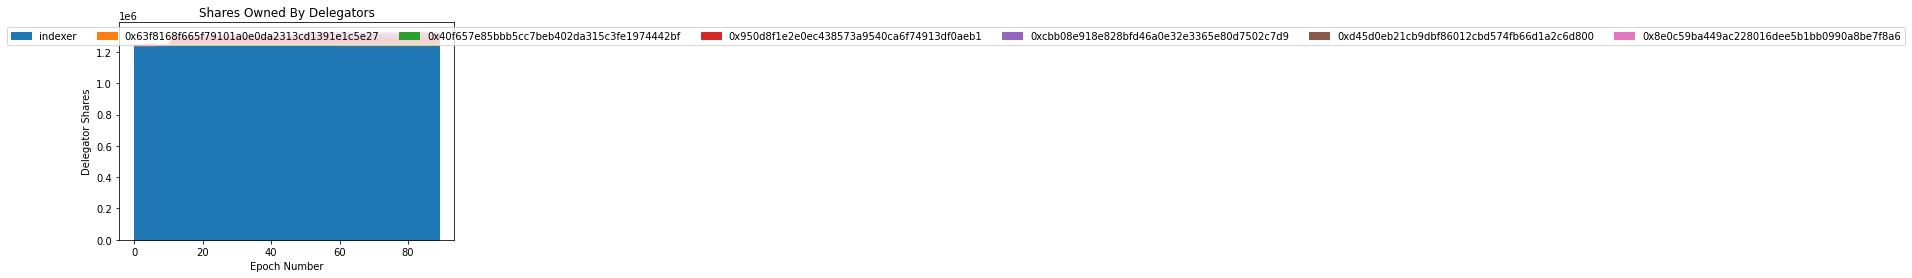

time: 281 ms (started: 2021-08-09 10:22:33 -04:00)


In [11]:


df_plot = pd.DataFrame(delegator_shares)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(2.5, 1), ncol=12)
plt.title('Shares Owned By Delegators')
plt.xlabel('Epoch Number')
plt.ylabel('Delegator Shares')

# Cumulative Revenue Token Holdings



Text(0, 0.5, 'Revenue Token Holdings')

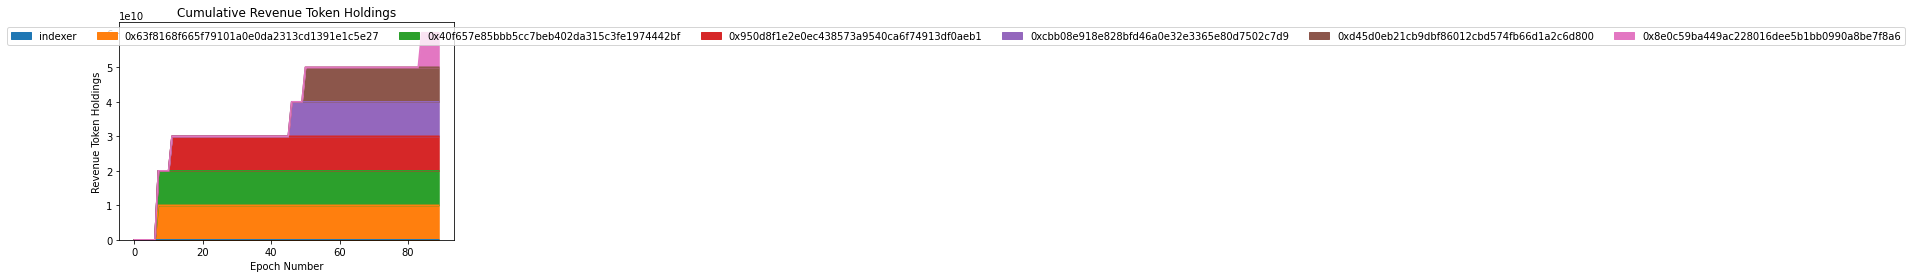

time: 328 ms (started: 2021-08-09 10:22:34 -04:00)


In [12]:
df_plot = pd.DataFrame(delegator_holdings)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(2.5, 1), ncol=12)
plt.title('Cumulative Revenue Token Holdings')
plt.xlabel('Epoch Number')
plt.ylabel('Revenue Token Holdings')

Exploratory data analysis

In [13]:
df['shareholders'] = df.delegators.apply(lambda x: [k for k in x.keys() if x[k].shares>0] )

time: 62 ms (started: 2021-08-09 10:22:34 -04:00)


In [14]:
df['total_shares'] = df.delegators.apply(lambda x: [x[k].shares for k in x.keys() if x[k].shares>0] )

time: 47 ms (started: 2021-08-09 10:22:35 -04:00)


In [15]:
df_list = []
for t in range(len(df)):
    temp_df = pd.DataFrame({'shareholder':df.shareholders.iloc[t] , 'shares':df.total_shares.iloc[t]})
    temp_df['Epoch Number'] = t

    df_list.append(temp_df)

shareholder_df = pd.concat(df_list)

time: 109 ms (started: 2021-08-09 10:22:35 -04:00)


In [16]:
shareholder_df

,shareholder,shares,Epoch Number
0,indexer,1243612,0
0,indexer,1243612,1
0,indexer,1243612,2
0,indexer,1243612,3
0,indexer,1243612,4
...,...,...,...
2,0x40f657e85bbb5cc7beb402da315c3fe1974442bf,9.6370000001E-15,89
3,0x950d8f1e2e0ec438573a9540ca6f74913df0aeb1,55222.50000000000000000000000,89
4,0xcbb08e918e828bfd46a0e32e3365e80d7502c7d9,89.934893884567142473999999,89
5,0xd45d0eb21cb9dbf86012cbd574fb66d1a2c6d800,19900.00000000000000000000000,89


time: 62 ms (started: 2021-08-09 10:22:35 -04:00)


# Price per share

In [17]:
df.pool_delegated_stake

5                            1243612
10                           1243612
15                           1243612
20                           1243612
25                           1243612
                   ...              
430    1322815.111243884567200334000
435    1322815.111243884567200334000
440    1322815.111243884567200334000
445    1322815.111243884567200334000
450    1322815.111243884567200334000
Name: pool_delegated_stake, Length: 90, dtype: object

time: 62 ms (started: 2021-08-09 10:22:35 -04:00)


In [18]:
# df['period_revenue_per_share'] = df.period_revenue/df.shares
# df.period_revenue

time: 47 ms (started: 2021-08-09 10:22:35 -04:00)


# Revenue per share 

In [19]:
# df.period_revenue_per_share.plot()

time: 63 ms (started: 2021-08-09 10:22:35 -04:00)


In [20]:
df.columns

Index(['id_indexer', 'pool_delegated_stake', 'pool_locked_stake', 'shares',
       'delegators', 'GRT', 'indexing_revenue', 'query_revenue', 'simulation',
       'subset', 'run', 'substep', 'timestep', 'shareholders', 'total_shares'],
      dtype='object')

time: 62 ms (started: 2021-08-09 10:22:35 -04:00)


In [21]:
df

,id_indexer,pool_delegated_stake,pool_locked_stake,shares,delegators,GRT,indexing_revenue,query_revenue,simulation,subset,run,substep,timestep,shareholders,total_shares
5,indexer,1243612,0,1243612,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,1,5,1,[indexer],[1243612]
10,indexer,1243612,0,1243612,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,1,5,2,[indexer],[1243612]
15,indexer,1243612,0,1243612,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,1,5,3,[indexer],[1243612]
20,indexer,1243612,0,1243612,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,1,5,4,[indexer],[1243612]
25,indexer,1243612,0,1243612,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,1,5,5,[indexer],[1243612]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,indexer,1322815.111243884567200334000,0,1322815.111243884567200334000,{'indexer': <model.parts.delegator.Delegator o...,2480000.000000000000000000,2480000.000000000000000000,0.970125109574860079,0,0,1,5,86,"[indexer, 0x63f8168f665f79101a0e0da2313cd1391e...","[1243612, 4.8223000000E-14, 9.6370000001E-15, ..."
435,indexer,1322815.111243884567200334000,0,1322815.111243884567200334000,{'indexer': <model.parts.delegator.Delegator o...,2480000.000000000000000000,2480000.000000000000000000,0.970125109574860079,0,0,1,5,87,"[indexer, 0x63f8168f665f79101a0e0da2313cd1391e...","[1243612, 4.8223000000E-14, 9.6370000001E-15, ..."
440,indexer,1322815.111243884567200334000,0,1322815.111243884567200334000,{'indexer': <model.parts.delegator.Delegator o...,2480000.000000000000000000,2480000.000000000000000000,0.970125109574860079,0,0,1,5,88,"[indexer, 0x63f8168f665f79101a0e0da2313cd1391e...","[1243612, 4.8223000000E-14, 9.6370000001E-15, ..."
445,indexer,1322815.111243884567200334000,0,1322815.111243884567200334000,{'indexer': <model.parts.delegator.Delegator o...,2480000.000000000000000000,2480000.000000000000000000,0.970125109574860079,0,0,1,5,89,"[indexer, 0x63f8168f665f79101a0e0da2313cd1391e...","[1243612, 4.8223000000E-14, 9.6370000001E-15, ..."


time: 63 ms (started: 2021-08-09 10:22:35 -04:00)
